In [21]:
# переменный по умлочаю в функции

In [28]:
def f1(x, z=['cc']):
    print(z)
    z.append(x)
    print(z)


In [29]:
f1('1')

['cc']
['cc', '1']


In [33]:
f1('2')

['cc', '1', '2', '2', '2']
['cc', '1', '2', '2', '2', '2']


In [ ]:
# join 

In [36]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()


In [41]:
cursor.execute("""
select title, price
from products_history 
where id in (1991, 1992, 1993 )
""")

print(cursor.fetchall())

[('Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704', 19647884), ('Южнопортовая 1 31 68.7 ул. Южнопортовая, вл.28-28а 55.705727,37.696445', 24214830), ('Мичуринский 6 15 86.9 Озерная ул., вл. 7 55.687726,37.471704', 44826261)]


In [47]:
cursor.execute("""
select *
from person_person 
""")

print(cursor.fetchall())

[(1, 'Vasya', 'Ivanov'), (2, 'Artem', 'Tsurkov')]


In [46]:
cursor.execute("""
insert into person_person(name, surname) values('Artem', 'Tsurkov')
""")

print(cursor.fetchall())

[]


In [53]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")

print(cursor.fetchall())

[(1, 1, 1991, '2022-12-18 19:56:00', 13753518, 1, 13753518, 'Мичуринский 2 27 39.8'), (2, 1, 1991, '2022-12-18 19:57:00', 16950381, 1, 16950381, 'Южнопортовая 1 31 68.7 ул. Южнопортовая')]


In [49]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) values(1, 1991, "2022-12-18 19:56:00", 13753518.00, 1, 13753518.00, "Мичуринский 2 27 39.8")
""")

print(cursor.fetchall())

[]


In [52]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) values(1, 1992, "2022-12-18 19:57:00", 16950381.00, 1, 16950381.00, "Южнопортовая 1 31 68.7 ул. Южнопортовая")
""")

print(cursor.fetchall())

[]


In [95]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")
cursor.fetchall()

[(1,
  1,
  1991,
  '2022-12-18 19:56:00',
  13753518,
  1,
  13753518,
  'Мичуринский 2 27 39.8'),
 (2,
  1,
  1991,
  '2022-12-18 19:57:00',
  16950381,
  1,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая')]

In [101]:
cursor.execute(""" 
update person_check set  offer_id = 1991  where id = 1
""")

print(cursor.fetchall())

[]


In [102]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")
cursor.fetchall()

[(1,
  1,
  1991,
  '2022-12-18 19:56:00',
  13753518,
  1,
  13753518,
  'Мичуринский 2 27 39.8'),
 (2,
  1,
  1992,
  '2022-12-18 19:57:00',
  16950381,
  1,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая')]

In [ ]:
cursor.execute("""
select 
""")

print(cursor.fetchall())

In [71]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, person.id, person.name, person.surname
from person_check as c join person_person as person
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Vasya', 'Ivanov'),
 (1, '2022-12-18 19:56:00', 1, 13753518, 2, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Vasya', 'Ivanov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 2, 'Artem', 'Tsurkov')]

In [80]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_check as c join person_person as p1 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Vasya', 'Ivanov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Vasya', 'Ivanov')]

In [86]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_person as p1  join  person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Vasya', 'Ivanov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Vasya', 'Ivanov')]

In [ ]:
#join inner, outher, left, right

In [ ]:
# left join

In [81]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_check as c left join person_person as p1 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Vasya', 'Ivanov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Vasya', 'Ivanov')]

In [83]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.datetime, c.person_id, c.final_sum
from person_person as p1 left join person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, 'Vasya', 'Ivanov', 1, '2022-12-18 19:56:00', 1, 13753518),
 (1, 'Vasya', 'Ivanov', 2, '2022-12-18 19:57:00', 1, 16950381),
 (2, 'Artem', 'Tsurkov', None, None, None, None)]

In [90]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.datetime, c.person_id, c.final_sum
from person_person as p1 inner join person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, 'Vasya', 'Ivanov', 1, '2022-12-18 19:56:00', 1, 13753518),
 (1, 'Vasya', 'Ivanov', 2, '2022-12-18 19:57:00', 1, 16950381)]

In [ ]:
#  join 3 таблиц

In [94]:
# все чеки с фио персон котрые их купили плюс превоналваыы офер
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.title, c.datetime, c.person_id, c.final_sum, h.id, h.price_sale, h.title
from person_person as p1 inner join person_check as c 
    on c.person_id = p1.id  join products_history as h on c.offer_id = h.id
""") 

cursor.fetchall()

[(1,
  'Vasya',
  'Ivanov',
  1,
  'Мичуринский 2 27 39.8',
  '2022-12-18 19:56:00',
  1,
  13753518,
  1991,
  13753518,
  'Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704'),
 (1,
  'Vasya',
  'Ivanov',
  2,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая',
  '2022-12-18 19:57:00',
  1,
  16950381,
  1991,
  13753518,
  'Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704')]

In [103]:
# все чеки с фио персон котрые их купили плюс превоналваыы офер
cursor.execute("""
select 
    p1.id, 
    p1.name, 
    p1.surname, 
    c.id, 
    c.title, 
    c.datetime, 
    c.person_id, 
    c.final_sum, 
    h.id, 
    h.price_sale, 
    h.title
from person_person as p1 
    inner join person_check as c 
        on c.person_id = p1.id  
    join products_history as h 
        on c.offer_id = h.id
""") 

cursor.fetchall()

[(1,
  'Vasya',
  'Ivanov',
  1,
  'Мичуринский 2 27 39.8',
  '2022-12-18 19:56:00',
  1,
  13753518,
  1991,
  13753518,
  'Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704'),
 (1,
  'Vasya',
  'Ivanov',
  2,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая',
  '2022-12-18 19:57:00',
  1,
  16950381,
  1992,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая, вл.28-28а 55.705727,37.696445')]

In [134]:
cursor.execute(""" 
update person_check set  price = 15000000  where id = 3
""")

print(cursor.fetchall())





[]


In [135]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select person_check.id, person_check.datetime,  person_check.person_id,  person_check.price
from person_check 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518),
 (2, '2022-12-18 19:57:00', 1, 16950381),
 (3, '2022-12-18 19:58:00', 3, 15000000)]

In [104]:
#окнооные функции

In [126]:
# group

cursor.execute("""
select person_id, count(1), max(price)
from person_check
group by person_id
""")

cursor.fetchall()

[(1, 2, 16950381), (3, 1, 100)]

In [ ]:
13753518

In [138]:
#пронмуеруме записаи для каждо полльзователя
cursor.execute("""
select person_id, 
    id,
    datetime,  
    price,
    ROW_NUMBER() OVER(PARTITION BY person_id ORDER BY datetime desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS prev_price,
    LAG(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS p_price
from person_check

""")

cursor.fetchall()

[(1, 2, '2022-12-18 19:57:00', 16950381, 1, 13753518, 0),
 (1, 1, '2022-12-18 19:56:00', 13753518, 2, 0, 16950381),
 (3, 3, '2022-12-18 19:58:00', 15000000, 1, 0, 0)]

In [137]:
#пронмуеруме записаи для каждо полльзователя
cursor.execute("""
select person_id, 
    id,
    datetime,  
    price,
    ROW_NUMBER() OVER(PARTITION BY person_id ORDER BY datetime desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS prev_price,
    LAG(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS p_price
from person_check

order by price desc
""")

cursor.fetchall()

[(1, 2, '2022-12-18 19:57:00', 16950381, 1, 13753518, 0),
 (3, 3, '2022-12-18 19:58:00', 15000000, 1, 0, 0),
 (1, 1, '2022-12-18 19:56:00', 13753518, 2, 0, 16950381)]

In [106]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) 
values(3, 1993, "2022-12-18 19:58:00", 100, 1, 100, "xyz")
""")

print(cursor.fetchall())


[]


In [ ]:
cursor.execute("""
            WITH sales_numbered AS (
                SELECT 
                    id, 
                    title,
                    price_sale,  
                    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
                    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
                    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
                FROM products_history
                where datetime_create >= "{d.date()}"
                ORDER BY id desc
                LIMIT 1000000
            )
            SELECT 
                id, 
                title,
                price_sale,  
                prev_price_sale,
                diff,
                ROUND(diff / price_sale * 100) as per,
                row_number
            FROM sales_numbered
            WHERE row_number = 1 and diff !=0 and diff != price_sale and (diff + prev_price_sale) != 0
            Order by per;

        """)

In [105]:
cursor.execute("""
SELECT 
    id, 
    title,
    price_sale,  
    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
FROM products_history
where datetime_create >= "2022-12-17"
ORDER BY id desc
LIMIT 10     
""")

cursor.fetchall()


[(893488,
  'Соус бальзамический Monini Balsamic Glaze со вкусом инжира, 250 г',
  786.99,
  0,
  786.99,
  1),
 (893487,
  'Топик-бра Pompea без боковых швов Brassiere Seam Nero, S/M',
  599.99,
  0,
  599.99,
  1),
 (893486,
  'Маска-патчи для глаз Organic Kitchen Супер увлажняющие Чайные пакетики сенча жидкие, 100 мл',
  212.99,
  0,
  212.99,
  1),
 (893485, 'Филе тунца, вес', 1899, 0, 1899, 1),
 (893484,
  'Масло магниевое Pure Bases для стройности тела, 150 мл',
  323,
  0,
  323,
  1),
 (893483,
  'Устройство зарядное GP U411 4КК.АА/2700, 1 шт',
  2039.99,
  0,
  2039.99,
  1),
 (893482, 'Лопатка Atmosphere Voyage нейлоновая', 152.9, 0, 152.9, 1),
 (893481,
  'Крем-краска для волос Syoss Color Интенсивный осветлитель тон 12-0',
  472.99,
  0,
  472.99,
  1),
 (893480,
  'Саморез универсальный «Каждый день» 5,0x 50 желтый оцинкованный, 8шт',
  39.99,
  0,
  39.99,
  1),
 (893479,
  'Пенка для лица очищающая Holika Holika Дейли Гарден рис, 120 мл',
  449.99,
  0,
  449.99,
  1)]

In [ ]:
# графики

In [8]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.6.2
module://matplotlib_inline.backend_inline


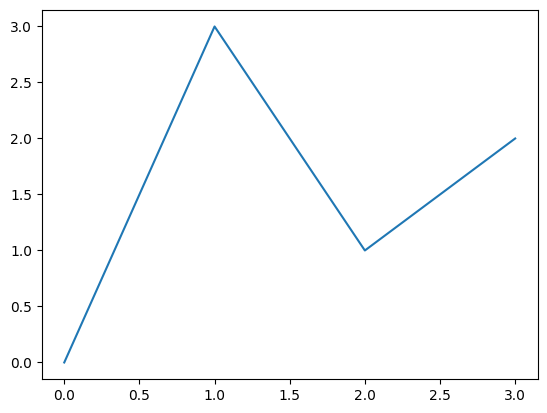

In [9]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()


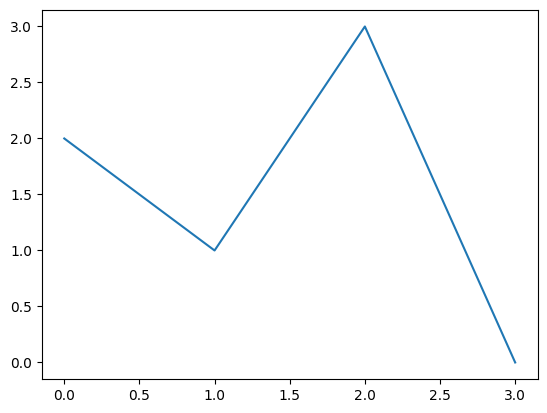

In [7]:
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

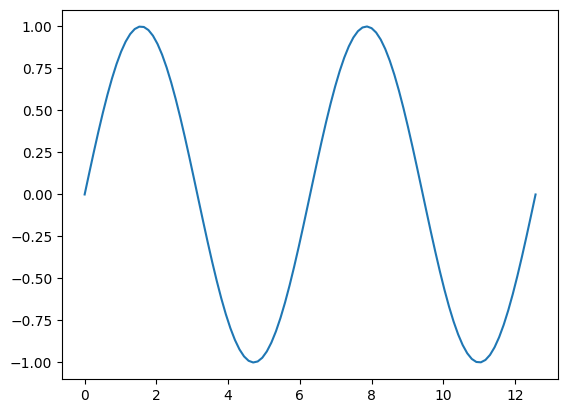

In [9]:
import numpy as np
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

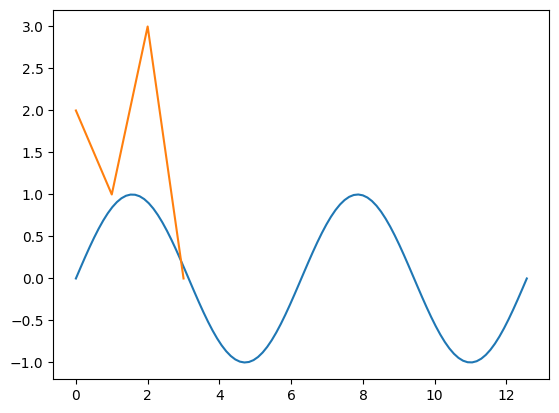

In [11]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

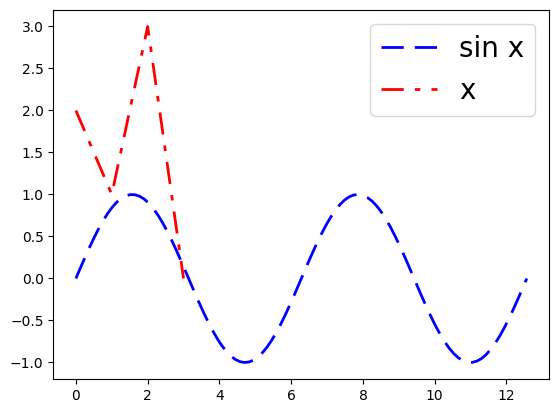

In [20]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), linewidth=2, color='b',  dashes=[8, 4], label=r'sin x')
plt.plot([0, 1, 2, 3], [2, 1, 3, 0], linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'x')
plt.legend(fontsize=20, loc=1)
plt.show()

In [21]:
# теперь попробуем соединить с нашими данными из бд

In [26]:
ls -la /tmp/sql_dump/db.sqlite3

ls: cannot access '/tmp/sql_dump/db.sqlite3': No such file or directory


In [32]:
mkdir /tmp/sql_dump

In [116]:
cp /home/jupyter-amtsu/project/price_alert/db.sqlite3 /tmp/sql_dump/db.sqlite3

In [16]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [17]:
cursor.execute("""
.tables
""")
cursor.fetchall()

OperationalError: near ".": syntax error

In [18]:
cursor.execute("""
select  price_sale, date(datetime_create)
from products_history 
where price > 10000
    and title like "%куртка%"
order by  price asc
limit 1000000
""")

x = []
y = []
for i in cursor.fetchall():
    x.append(i[1])
    y.append(i[0])

In [19]:

cursor.execute("""
select  distinct(title)
from products_history 
where title like "%Nutella%"
limit 1000000
""")

print(cursor.fetchall())

[('Батончик Nutella B-Ready 22г',), ('Паста Nutella Шоколадная 52г',), ('Паста Nutella Шоколадная 180г',), ('Паста Nutella Шоколадная 350г',), ('Паста Nutella Шоколадная 630г',), ('Паста Nutella ореховая с добавлением какао 350г',)]


In [20]:

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%utella%"
    and title like "%350%"
order by  d asc, price_sale asc
limit 1000000
""")

#print(cursor.fetchall())
x = []
y = []
for i in cursor.fetchall():
    print(i)
    x.append(i[1])
    y.append(i[0])

(389, '2022-12-06', 'Паста Nutella Шоколадная 350г')
(389, '2022-12-07', 'Паста Nutella Шоколадная 350г')
(389, '2022-12-07', 'Паста Nutella Шоколадная 350г')
(359, '2022-12-08', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-09', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-10', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-11', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-12', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-13', 'Паста Nutella Шоколадная 350г')
(349.99, '2022-12-14', 'Паста Nutella ореховая с добавлением какао 350г')
(499, '2022-12-14', 'Паста Nutella Шоколадная 350г')
(349.99, '2022-12-15', 'Паста Nutella ореховая с добавлением какао 350г')
(455, '2022-12-15', 'Паста Nutella Шоколадная 350г')
(349.99, '2022-12-16', 'Паста Nutella ореховая с добавлением какао 350г')
(349.99, '2022-12-17', 'Паста Nutella ореховая с добавлением какао 350г')
(349.99, '2022-12-18', 'Паста Nutella ореховая с добавлением какао 350г')


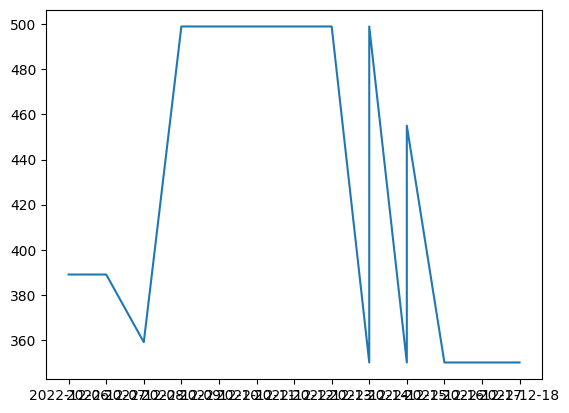

In [13]:
plt.figure()
#plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.plot(x, y)
plt.show()

In [14]:

cursor.execute("""
select  distinct(title)
from products_history 
where title like "%raffaello%"
limit 1000000
""")

print(cursor.fetchall())

[('Набор Конфет Raffaello 70г',), ('Набор Конфет Raffaello 90г',), ('Набор Конфет Raffaello 150г',), ('Конфеты Raffaello 40г',), ('Набор Конфет Raffaello Тортик 100г',), ('Набор Конфет Raffaello Маракуйя 150г',), ('Набор Конфет Raffaello 240г',), ('Набор Конфет Raffaello Тортик 200г',), ('Набор Конфет Raffaello Сердце 300г',), ('НАБОР КОНФЕТ RAFFAELLO СУНДУЧОК 240г',), ('НАБОР КОНФЕТ RAFFAELLO 500Г',), ('Конфеты raffaello со вкусом маракуйи покрытые кокосовой стружкой с цельным миндальным орехом внутри 150г',)]


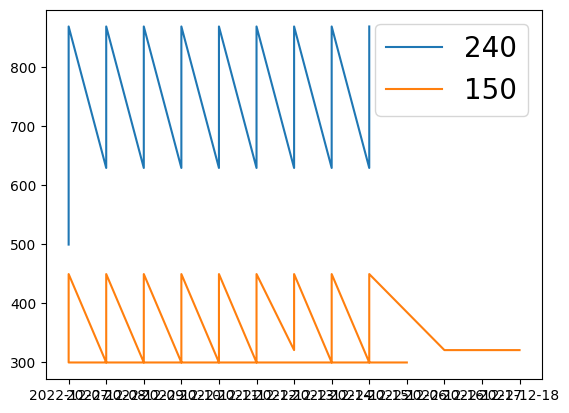

In [15]:

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%raffaello%"
    and title like "%240%"
order by  d asc, price_sale asc, title asc
limit 1000000
""")

#print(cursor.fetchall())
x = []
y = []
for i in cursor.fetchall():
    #print(i)
    x.append(i[1])
    y.append(i[0])
    
    

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%raffaello%"
    and title like "%150%"
order by  d asc, price_sale asc, title asc
limit 1000000
""")

#print(cursor.fetchall())
x2 = []
y2 = []
for i in cursor.fetchall():
    #print(i)
    x2.append(i[1])
    y2.append(i[0])
    
plt.figure()
#plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.plot(x, y, label=r'240')
plt.plot(x2, y2, label=r'150')
plt.legend(fontsize=20, loc=1)
plt.show()